In [1]:
import pandas as pd

df_turnstile1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210320.txt')
df_turnstile2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210327.txt')
df_turnstile3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210403.txt')
df_turnstile4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210410.txt')
df_turnstile5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210417.txt')
df_turnstile6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210424.txt')
df_turnstile7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210501.txt')
df_turnstile8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210508.txt')
df_turnstile9 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210515.txt')
df_turnstile10 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210522.txt')
df_turnstile11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210529.txt')
df_turnstile12 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210605.txt')

df_turnstile = pd.concat([df_turnstile1,df_turnstile2,df_turnstile3,df_turnstile4,df_turnstile5,df_turnstile6,df_turnstile7,df_turnstile8,df_turnstile9,df_turnstile10,df_turnstile11,df_turnstile12])
df_turnstile

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008
...,...,...,...,...,...,...,...,...,...,...,...
209288,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/15/2021,13:00:00,REGULAR,5554,585
209289,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/16/2021,09:00:00,REGULAR,5554,585
209290,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/16/2021,13:00:00,REGULAR,5554,585
209291,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/16/2021,17:00:00,REGULAR,5554,585


In [2]:
#Check for columns
df_turnstile.columns = [column.strip() for column in df_turnstile.columns]
df_turnstile.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [3]:
#Add date-time
df_turnstile["DATE-TIME"] = pd.to_datetime(df_turnstile["DATE"] + ' ' + df_turnstile["TIME"])
df_turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE-TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00


In [4]:
#Check for duplicates
(df_turnstile
 .groupby(["C/A", "UNIT", "SCP", "STATION","DATE-TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE-TIME,ENTRIES
213781,B024,R211,00-05-00,KINGS HWY,2021-05-05 04:00:00,2
213763,B024,R211,00-05-00,KINGS HWY,2021-05-02 04:00:00,2
213766,B024,R211,00-05-00,KINGS HWY,2021-05-02 16:00:00,2
213767,B024,R211,00-05-00,KINGS HWY,2021-05-02 20:00:00,2
213768,B024,R211,00-05-00,KINGS HWY,2021-05-03 00:00:00,2


In [5]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
import datetime

mask = ((df_turnstile["C/A"] == "B024") & 
(df_turnstile["UNIT"] == "R211") & 
(df_turnstile["SCP"] == "00-05-00") & 
(df_turnstile["STATION"] == "KINGS HWY") &
(df_turnstile["DATE-TIME"].dt.date == datetime.datetime(2021, 5, 5).date()))

df_turnstile[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE-TIME
17750,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/05/2021,00:00:00,REGULAR,262152,0,2021-05-05 00:00:00
17751,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/05/2021,00:00:00,RECOVR AUD,19,0,2021-05-05 00:00:00
17752,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/05/2021,04:00:00,REGULAR,262152,0,2021-05-05 04:00:00
17753,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/05/2021,04:00:00,RECOVR AUD,19,0,2021-05-05 04:00:00
17754,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/05/2021,08:00:00,REGULAR,262152,0,2021-05-05 08:00:00


In [6]:
df_turnstile.DESC.value_counts()

REGULAR       2501726
RECOVR AUD      10204
Name: DESC, dtype: int64

In [7]:
#Dropping all duplicates
df_turnstile.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE-TIME"], inplace=True, ascending=False)
df_turnstile.drop_duplicates(subset=["C/A","UNIT","SCP","STATION","DATE-TIME"], inplace=True)
df_turnstile.DESC.value_counts()

REGULAR       2501726
RECOVR AUD      10158
Name: DESC, dtype: int64

In [8]:
#Checking again once more if all data is unique

df_turnstile.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE-TIME"], 
                          inplace=True, ascending=False)
df_turnstile.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE-TIME"], inplace=True)

(df_turnstile
 .groupby(["C/A", "UNIT", "SCP", "STATION","DATE-TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE-TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-04-24 00:00:00,1
1674593,R138,R293,00-03-03,34 ST-PENN STA,2021-06-10 10:00:00,1
1674586,R138,R293,00-03-03,34 ST-PENN STA,2021-06-09 06:00:00,1
1674587,R138,R293,00-03-03,34 ST-PENN STA,2021-06-09 10:00:00,1
1674588,R138,R293,00-03-03,34 ST-PENN STA,2021-06-09 14:00:00,1


In [9]:
df_turnstile.reset_index()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE-TIME
0,209292,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/16/2021,21:00:00,REGULAR,5554,585,2021-07-16 21:00:00
1,209291,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/16/2021,17:00:00,REGULAR,5554,585,2021-07-16 17:00:00
2,209290,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/16/2021,13:00:00,REGULAR,5554,585,2021-07-16 13:00:00
3,209289,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/16/2021,09:00:00,REGULAR,5554,585,2021-07-16 09:00:00
4,209288,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/15/2021,13:00:00,REGULAR,5554,585,2021-07-15 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511879,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00
2511880,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
2511881,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
2511882,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00


In [10]:
#Unique Turnstile
#df_turnstile["UNIQUE-STATION"] = df_turnstile["C/A"] + ' ' + df_turnstile["UNIT"] + ' ' + df_turnstile["SCP"] + ' ' + df_turnstile["STATION"]
#Drop Exits and DESC
df_turnstile = df_turnstile.drop(["EXITS", "DESC","LINENAME","DIVISION"], axis=1, errors="ignore")
df_turnstile.tail(20)


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DATE-TIME
19,A002,R051,02-00-00,59 ST,04/27/2021,04:00:00,7562370,2021-04-27 04:00:00
18,A002,R051,02-00-00,59 ST,04/27/2021,00:00:00,7562365,2021-04-27 00:00:00
17,A002,R051,02-00-00,59 ST,04/26/2021,20:00:00,7562300,2021-04-26 20:00:00
16,A002,R051,02-00-00,59 ST,04/26/2021,16:00:00,7562093,2021-04-26 16:00:00
15,A002,R051,02-00-00,59 ST,04/26/2021,12:00:00,7561945,2021-04-26 12:00:00
14,A002,R051,02-00-00,59 ST,04/26/2021,08:00:00,7561888,2021-04-26 08:00:00
13,A002,R051,02-00-00,59 ST,04/26/2021,04:00:00,7561874,2021-04-26 04:00:00
12,A002,R051,02-00-00,59 ST,04/26/2021,00:00:00,7561870,2021-04-26 00:00:00
11,A002,R051,02-00-00,59 ST,04/25/2021,20:00:00,7561843,2021-04-25 20:00:00
10,A002,R051,02-00-00,59 ST,04/25/2021,16:00:00,7561740,2021-04-25 16:00:00


In [11]:
turnstiles_daily = (df_turnstile
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily.head(50)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/24/2021,7561578
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448
5,A002,R051,02-00-00,59 ST,04/29/2021,7563968
6,A002,R051,02-00-00,59 ST,04/30/2021,7564517
7,A002,R051,02-00-00,59 ST,05/01/2021,7564974
8,A002,R051,02-00-00,59 ST,05/02/2021,7565300
9,A002,R051,02-00-00,59 ST,05/03/2021,7565798


In [12]:
#Include previous entries and drop all NaN
turnstiles_daily['PREV_ENTRIES']=turnstiles_daily.ENTRIES.shift(1)
turnstiles_daily.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True)
turnstiles_daily.head(20)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,04/25/2021,7561843,7561578.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7562300,7561843.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562873,7562300.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7563448,7562873.0
5,A002,R051,02-00-00,59 ST,04/29/2021,7563968,7563448.0
6,A002,R051,02-00-00,59 ST,04/30/2021,7564517,7563968.0
7,A002,R051,02-00-00,59 ST,05/01/2021,7564974,7564517.0
8,A002,R051,02-00-00,59 ST,05/02/2021,7565300,7564974.0
9,A002,R051,02-00-00,59 ST,05/03/2021,7565798,7565300.0
10,A002,R051,02-00-00,59 ST,05/04/2021,7566364,7565798.0


In [13]:
def daily_entry_count(df_row,max_count):
    counter = df_row["ENTRIES"] - df_row["PREV_ENTRIES"]
    if counter < 0:
        counter =- counter
    if counter > max_count:
        return 0
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(daily_entry_count, axis=1 , max_count=100000)
turnstiles_daily.iloc[50:100]


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
51,A002,R051,02-00-00,59 ST,06/14/2021,7586517,7586012.0,505.0
52,A002,R051,02-00-00,59 ST,06/15/2021,7587126,7586517.0,609.0
53,A002,R051,02-00-00,59 ST,06/16/2021,7587813,7587126.0,687.0
54,A002,R051,02-00-00,59 ST,06/17/2021,7588458,7587813.0,645.0
55,A002,R051,02-00-00,59 ST,06/18/2021,7589079,7588458.0,621.0
56,A002,R051,02-00-00,59 ST,06/19/2021,7589434,7589079.0,355.0
57,A002,R051,02-00-00,59 ST,06/20/2021,7589623,7589434.0,189.0
58,A002,R051,02-00-00,59 ST,06/21/2021,7590174,7589623.0,551.0
59,A002,R051,02-00-00,59 ST,06/22/2021,7590778,7590174.0,604.0
60,A002,R051,02-00-00,59 ST,06/23/2021,7591449,7590778.0,671.0


In [14]:
unique_turnstile_loc_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[["DAILY_ENTRIES"]].sum().reset_index()
unique_turnstile_loc_daily

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,04/24/2021,0.0
1,A002,R051,59 ST,04/25/2021,2042.0
2,A002,R051,59 ST,04/26/2021,4247.0
3,A002,R051,59 ST,04/27/2021,4847.0
4,A002,R051,59 ST,04/28/2021,4829.0
...,...,...,...,...,...
62954,TRAM2,R469,RIT-ROOSEVELT,07/12/2021,1926.0
62955,TRAM2,R469,RIT-ROOSEVELT,07/13/2021,2113.0
62956,TRAM2,R469,RIT-ROOSEVELT,07/14/2021,2117.0
62957,TRAM2,R469,RIT-ROOSEVELT,07/15/2021,2096.0


In [15]:
unique_station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[["DAILY_ENTRIES"]].sum().reset_index()
unique_station_daily

,STATION,DATE,DAILY_ENTRIES
0,1 AV,04/24/2021,438397.0
1,1 AV,04/25/2021,4578.0
2,1 AV,04/26/2021,6686.0
3,1 AV,04/27/2021,6895.0
4,1 AV,04/28/2021,7118.0
...,...,...,...
31794,ZEREGA AV,07/12/2021,1091.0
31795,ZEREGA AV,07/13/2021,1177.0
31796,ZEREGA AV,07/14/2021,1141.0
31797,ZEREGA AV,07/15/2021,1183.0


In [16]:
total_station = unique_station_daily.groupby(["STATION"])["DAILY_ENTRIES"].sum().reset_index().sort_values('DAILY_ENTRIES',ascending=False)
total_station.head(10)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,3638541.0
59,34 ST-HERALD SQ,2756231.0
110,86 ST,2706856.0
233,GRD CNTRL-42 ST,2674181.0
315,PATH NEW WTC,2653113.0
14,14 ST-UNION SQ,2436087.0
46,23 ST,2354158.0
9,125 ST,2295090.0
68,42 ST-PORT AUTH,2270695.0
226,FULTON ST,1978004.0


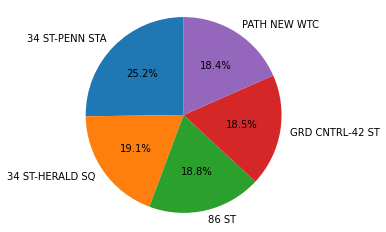

In [17]:
import matplotlib.pyplot as plt

#Pie Chart - Top 5
labels = total_station.iat[0,0], total_station.iat[1,0], total_station.iat[2,0], total_station.iat[3,0], total_station.iat[4,0]
daily_entries_lst = total_station.iat[0,1], total_station.iat[1,1], total_station.iat[2,1], total_station.iat[3,1], total_station.iat[4,1]

fig1, ax1 = plt.subplots()
ax1.pie(daily_entries_lst, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

In [18]:
unique_station_daily.loc[(unique_station_daily["STATION"]=="34 ST-PENN STA")]

,STATION,DATE,DAILY_ENTRIES
5122,34 ST-PENN STA,04/24/2021,225805.0
5123,34 ST-PENN STA,04/25/2021,20001.0
5124,34 ST-PENN STA,04/26/2021,36420.0
5125,34 ST-PENN STA,04/27/2021,37665.0
5126,34 ST-PENN STA,04/28/2021,38504.0
...,...,...,...
5201,34 ST-PENN STA,07/12/2021,48416.0
5202,34 ST-PENN STA,07/13/2021,49081.0
5203,34 ST-PENN STA,07/14/2021,51639.0
5204,34 ST-PENN STA,07/15/2021,53347.0


Text(0.5, 1.0, '34 ST-PENN STA - DAILY STATION PLOT')

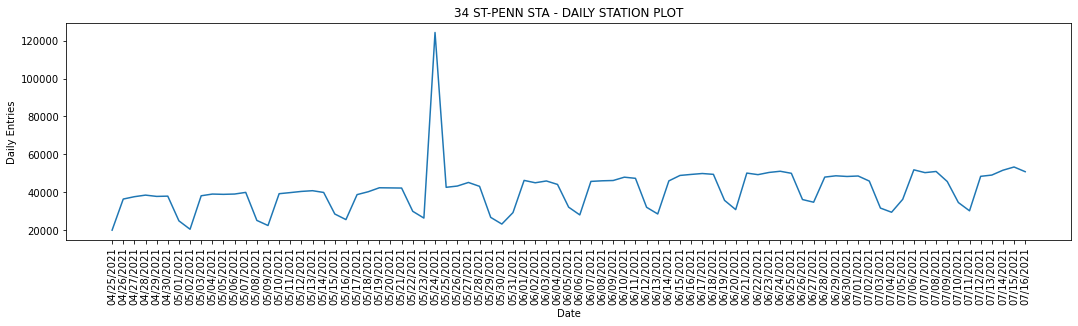

In [88]:
#Single Station Daily Plot - 34 ST-PENN STA

one_station_daily=unique_station_daily[(unique_station_daily["STATION"]=="34 ST-PENN STA")].copy()
one_station_daily=one_station_daily.drop([5122]) #Drop first data point since there is no real info on the previous entry

plt.figure(figsize=(18,4))
plt.plot(one_station_daily['DATE'],one_station_daily['DAILY_ENTRIES'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('34 ST-PENN STA - DAILY STATION PLOT')

Text(0.5, 1.0, '34 ST-HERALD SQ - DAILY STATION PLOT')

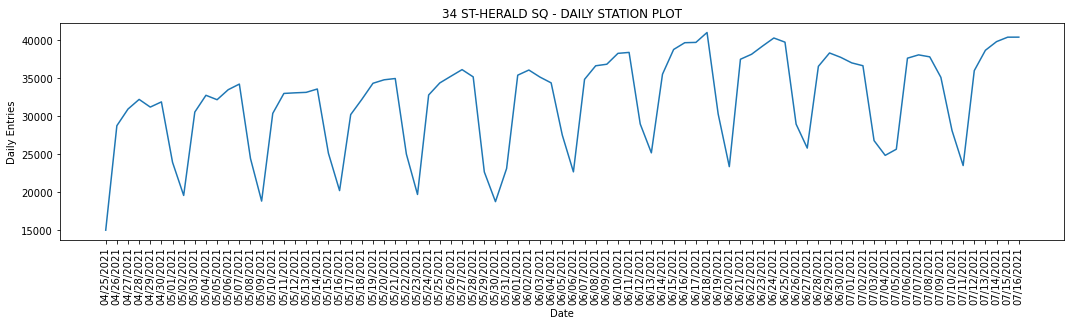

In [89]:
#Single Station Daily Plot - 34 ST-HERALD SQ

two_station_daily=unique_station_daily[(unique_station_daily["STATION"]=="34 ST-HERALD SQ")].copy()
two_station_daily=two_station_daily.drop([4954])

plt.figure(figsize=(18,4))
plt.plot(two_station_daily['DATE'],two_station_daily['DAILY_ENTRIES'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('34 ST-HERALD SQ - DAILY STATION PLOT')

Text(0.5, 1.0, 'GRD CNTRL-42 ST - DAILY STATION PLOT')

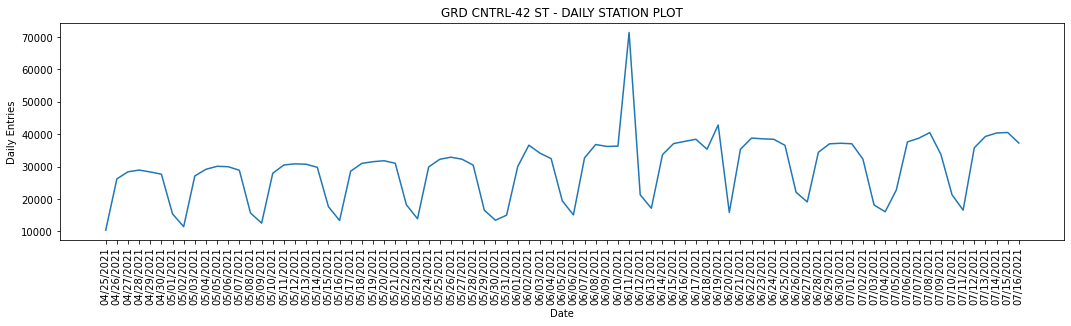

In [91]:
#Single Station Daily Plot - 34 ST-HERALD SQ

three_station_daily=unique_station_daily[(unique_station_daily["STATION"]=="GRD CNTRL-42 ST")].copy()
three_station_daily=three_station_daily.drop([19566])

plt.figure(figsize=(18,4))
plt.plot(three_station_daily['DATE'],three_station_daily['DAILY_ENTRIES'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('GRD CNTRL-42 ST - DAILY STATION PLOT')

Text(0.5, 1.0, '14 ST-UNION SQ - DAILY STATION PLOT')

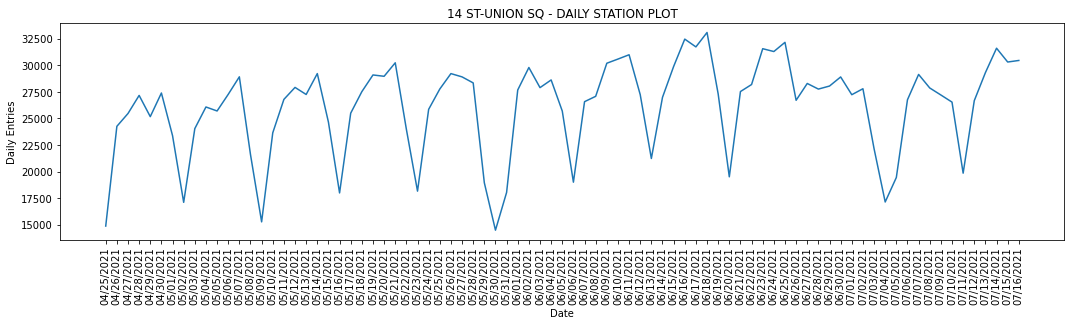

In [93]:
four_station_daily=unique_station_daily[(unique_station_daily["STATION"]=="14 ST-UNION SQ")].copy()
four_station_daily=four_station_daily.drop([1176])

plt.figure(figsize=(18,4))
plt.plot(four_station_daily['DATE'],four_station_daily['DAILY_ENTRIES'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('14 ST-UNION SQ - DAILY STATION PLOT')

Text(0.5, 1.0, '23 ST - DAILY STATION PLOT')

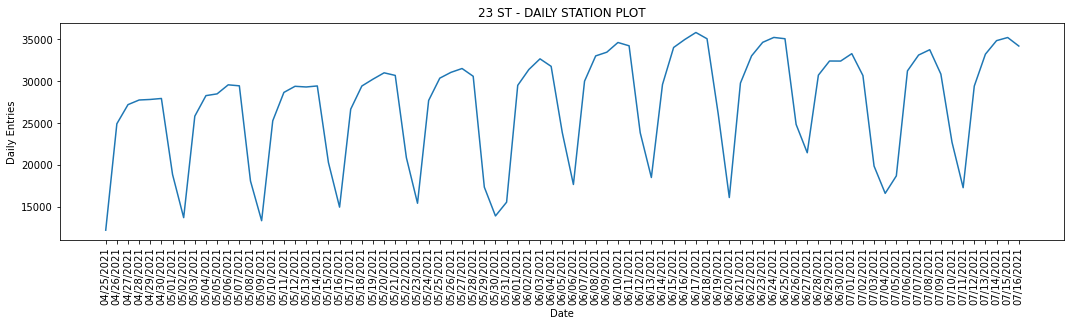

In [97]:
five_station_daily=unique_station_daily[(unique_station_daily["STATION"]=="23 ST")].copy()
five_station_daily=five_station_daily.drop([3862])

plt.figure(figsize=(18,4))
plt.plot(five_station_daily['DATE'],five_station_daily['DAILY_ENTRIES'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('23 ST - DAILY STATION PLOT')

Text(0.5, 1.0, '42 ST-PORT AUTH - DAILY STATION PLOT')

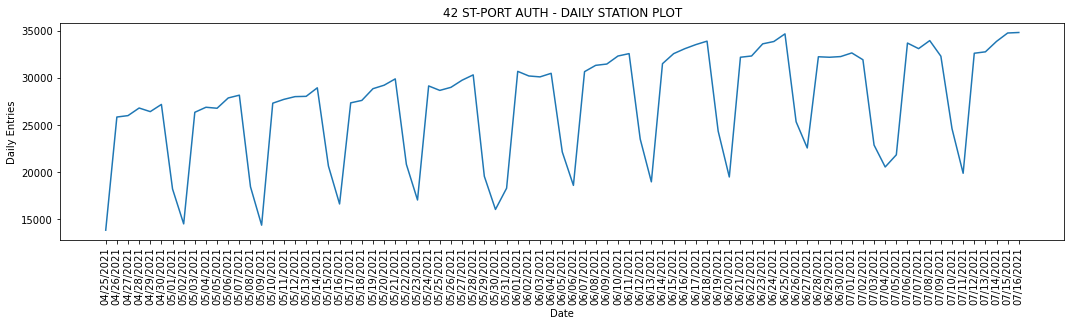

In [99]:
six_station_daily=unique_station_daily[(unique_station_daily["STATION"]=="42 ST-PORT AUTH")].copy()
six_station_daily=six_station_daily.drop([5710])

plt.figure(figsize=(18,4))
plt.plot(six_station_daily['DATE'],six_station_daily['DAILY_ENTRIES'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('42 ST-PORT AUTH - DAILY STATION PLOT')

In [100]:
import numpy as np

one_station_daily['DAYS_OF_WEEK'] = pd.to_datetime(one_station_daily['DATE']).dt.day_name()
one_station_daily['WEEK_OF_YEAR'] = pd.to_datetime(one_station_daily['DATE']).dt.isocalendar().week

two_station_daily['DAYS_OF_WEEK'] = pd.to_datetime(two_station_daily['DATE']).dt.day_name()
two_station_daily['WEEK_OF_YEAR'] = pd.to_datetime(two_station_daily['DATE']).dt.isocalendar().week

three_station_daily['DAYS_OF_WEEK'] = pd.to_datetime(three_station_daily['DATE']).dt.day_name()
three_station_daily['WEEK_OF_YEAR'] = pd.to_datetime(three_station_daily['DATE']).dt.isocalendar().week

four_station_daily['DAYS_OF_WEEK'] = pd.to_datetime(four_station_daily['DATE']).dt.day_name()
four_station_daily['WEEK_OF_YEAR'] = pd.to_datetime(four_station_daily['DATE']).dt.isocalendar().week

five_station_daily['DAYS_OF_WEEK'] = pd.to_datetime(five_station_daily['DATE']).dt.day_name()
five_station_daily['WEEK_OF_YEAR'] = pd.to_datetime(five_station_daily['DATE']).dt.isocalendar().week

six_station_daily['DAYS_OF_WEEK'] = pd.to_datetime(six_station_daily['DATE']).dt.day_name()
six_station_daily['WEEK_OF_YEAR'] = pd.to_datetime(six_station_daily['DATE']).dt.isocalendar().week

six_station_daily.head(50)

,STATION,DATE,DAILY_ENTRIES,DAYS_OF_WEEK,WEEK_OF_YEAR
5711,42 ST-PORT AUTH,04/25/2021,13862.0,Sunday,16
5712,42 ST-PORT AUTH,04/26/2021,25844.0,Monday,17
5713,42 ST-PORT AUTH,04/27/2021,25993.0,Tuesday,17
5714,42 ST-PORT AUTH,04/28/2021,26798.0,Wednesday,17
5715,42 ST-PORT AUTH,04/29/2021,26416.0,Thursday,17
5716,42 ST-PORT AUTH,04/30/2021,27178.0,Friday,17
5717,42 ST-PORT AUTH,05/01/2021,18223.0,Saturday,17
5718,42 ST-PORT AUTH,05/02/2021,14528.0,Sunday,17
5719,42 ST-PORT AUTH,05/03/2021,26345.0,Monday,18
5720,42 ST-PORT AUTH,05/04/2021,26878.0,Tuesday,18


In [106]:
one_station_daily

,STATION,DATE,DAILY_ENTRIES,DAYS_OF_WEEK,WEEK_OF_YEAR
5123,34 ST-PENN STA,04/25/2021,20001.0,Sunday,16
5124,34 ST-PENN STA,04/26/2021,36420.0,Monday,17
5125,34 ST-PENN STA,04/27/2021,37665.0,Tuesday,17
5126,34 ST-PENN STA,04/28/2021,38504.0,Wednesday,17
5127,34 ST-PENN STA,04/29/2021,37821.0,Thursday,17
...,...,...,...,...,...
5201,34 ST-PENN STA,07/12/2021,48416.0,Monday,28
5202,34 ST-PENN STA,07/13/2021,49081.0,Tuesday,28
5203,34 ST-PENN STA,07/14/2021,51639.0,Wednesday,28
5204,34 ST-PENN STA,07/15/2021,53347.0,Thursday,28


In [107]:
#one_station_daily=one_station_daily.drop([5123])
#one_station_daily=one_station_daily.drop([5152])
one_station_daily

#Daily Average
penn_34_daily={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
herald_34_daily={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
grd_central_daily={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
union_14_daily={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
twenty_three_daily={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
porth_42_daily={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}

for idx, val in enumerate(one_station_daily['DAYS_OF_WEEK']):
    if val == 'Monday':
        penn_34_daily['Monday'].append(one_station_daily['DAILY_ENTRIES'][one_station_daily.index[idx]])
        herald_34_daily['Monday'].append(two_station_daily['DAILY_ENTRIES'][two_station_daily.index[idx]])
        grd_central_daily['Monday'].append(three_station_daily['DAILY_ENTRIES'][three_station_daily.index[idx]])
        union_14_daily['Monday'].append(four_station_daily['DAILY_ENTRIES'][four_station_daily.index[idx]])
        twenty_three_daily['Monday'].append(five_station_daily['DAILY_ENTRIES'][five_station_daily.index[idx]])
        porth_42_daily['Monday'].append(six_station_daily['DAILY_ENTRIES'][six_station_daily.index[idx]])
    if val == 'Tuesday':
        penn_34_daily['Tuesday'].append(one_station_daily['DAILY_ENTRIES'][one_station_daily.index[idx]])
        herald_34_daily['Tuesday'].append(two_station_daily['DAILY_ENTRIES'][two_station_daily.index[idx]])
        grd_central_daily['Tuesday'].append(three_station_daily['DAILY_ENTRIES'][three_station_daily.index[idx]])
        union_14_daily['Tuesday'].append(four_station_daily['DAILY_ENTRIES'][four_station_daily.index[idx]])
        twenty_three_daily['Tuesday'].append(five_station_daily['DAILY_ENTRIES'][five_station_daily.index[idx]])
        porth_42_daily['Tuesday'].append(six_station_daily['DAILY_ENTRIES'][six_station_daily.index[idx]])
    if val == 'Wednesday':
        penn_34_daily['Wednesday'].append(one_station_daily['DAILY_ENTRIES'][one_station_daily.index[idx]])
        herald_34_daily['Wednesday'].append(two_station_daily['DAILY_ENTRIES'][two_station_daily.index[idx]])
        grd_central_daily['Wednesday'].append(three_station_daily['DAILY_ENTRIES'][three_station_daily.index[idx]])
        union_14_daily['Wednesday'].append(four_station_daily['DAILY_ENTRIES'][four_station_daily.index[idx]])
        twenty_three_daily['Wednesday'].append(five_station_daily['DAILY_ENTRIES'][five_station_daily.index[idx]])
        porth_42_daily['Wednesday'].append(six_station_daily['DAILY_ENTRIES'][six_station_daily.index[idx]])
    if val == 'Thursday':
        penn_34_daily['Thursday'].append(one_station_daily['DAILY_ENTRIES'][one_station_daily.index[idx]])
        herald_34_daily['Thursday'].append(two_station_daily['DAILY_ENTRIES'][two_station_daily.index[idx]])
        grd_central_daily['Thursday'].append(three_station_daily['DAILY_ENTRIES'][three_station_daily.index[idx]])
        union_14_daily['Thursday'].append(four_station_daily['DAILY_ENTRIES'][four_station_daily.index[idx]])
        twenty_three_daily['Thursday'].append(five_station_daily['DAILY_ENTRIES'][five_station_daily.index[idx]])
        porth_42_daily['Thursday'].append(six_station_daily['DAILY_ENTRIES'][six_station_daily.index[idx]])
    if val == 'Friday':
        penn_34_daily['Friday'].append(one_station_daily['DAILY_ENTRIES'][one_station_daily.index[idx]])
        herald_34_daily['Friday'].append(two_station_daily['DAILY_ENTRIES'][two_station_daily.index[idx]])
        grd_central_daily['Friday'].append(three_station_daily['DAILY_ENTRIES'][three_station_daily.index[idx]])
        union_14_daily['Friday'].append(four_station_daily['DAILY_ENTRIES'][four_station_daily.index[idx]])
        twenty_three_daily['Friday'].append(five_station_daily['DAILY_ENTRIES'][five_station_daily.index[idx]])
        porth_42_daily['Friday'].append(six_station_daily['DAILY_ENTRIES'][six_station_daily.index[idx]])
    if val == 'Saturday':
        penn_34_daily['Saturday'].append(one_station_daily['DAILY_ENTRIES'][one_station_daily.index[idx]])
        herald_34_daily['Saturday'].append(two_station_daily['DAILY_ENTRIES'][two_station_daily.index[idx]])
        grd_central_daily['Saturday'].append(three_station_daily['DAILY_ENTRIES'][three_station_daily.index[idx]])
        union_14_daily['Saturday'].append(four_station_daily['DAILY_ENTRIES'][four_station_daily.index[idx]])
        twenty_three_daily['Saturday'].append(five_station_daily['DAILY_ENTRIES'][five_station_daily.index[idx]])
        porth_42_daily['Saturday'].append(six_station_daily['DAILY_ENTRIES'][six_station_daily.index[idx]])
    if val == 'Sunday':
        penn_34_daily['Sunday'].append(one_station_daily['DAILY_ENTRIES'][one_station_daily.index[idx]])
        herald_34_daily['Sunday'].append(two_station_daily['DAILY_ENTRIES'][two_station_daily.index[idx]])
        grd_central_daily['Sunday'].append(three_station_daily['DAILY_ENTRIES'][three_station_daily.index[idx]])
        union_14_daily['Sunday'].append(four_station_daily['DAILY_ENTRIES'][four_station_daily.index[idx]])
        twenty_three_daily['Sunday'].append(five_station_daily['DAILY_ENTRIES'][five_station_daily.index[idx]])
        porth_42_daily['Sunday'].append(six_station_daily['DAILY_ENTRIES'][six_station_daily.index[idx]])
        
penn_34_daily_average={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
herald_34_daily_average={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
grd_central_daily_average={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
union_14_daily_average={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
twenty_three_daily_average={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}
porth_42_daily_average={'Monday':[],'Tuesday':[],'Wednesday':[],'Thursday':[],'Friday':[],'Saturday':[],'Sunday':[]}

for idx in penn_34_daily.keys():
    penn_34_daily_average[idx]=np.average(penn_34_daily[idx])
for idx in herald_34_daily.keys():
    herald_34_daily_average[idx]=np.average(herald_34_daily[idx])
for idx in grd_central_daily.keys():
    grd_central_daily_average[idx]=np.average(grd_central_daily[idx])
for idx in union_14_daily.keys():
    union_14_daily_average[idx]=np.average(union_14_daily[idx])
for idx in twenty_three_daily.keys():
    twenty_three_daily_average[idx]=np.average(twenty_three_daily[idx])
for idx in porth_42_daily.keys():
    porth_42_daily_average[idx]=np.average(porth_42_daily[idx])
    
twenty_three_daily_average

{'Monday': 26167.833333333332,
 'Tuesday': 30849.5,
 'Wednesday': 31799.5,
 'Thursday': 32467.916666666668,
 'Friday': 31647.25,
 'Saturday': 21513.0,
 'Sunday': 15930.25}

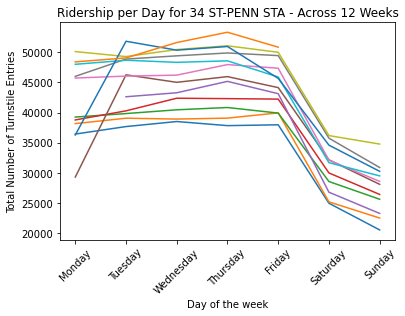

In [79]:
#Single Station Overlaid Weekly Plot - 34 ST-PENN STA

for i, group in one_station_daily.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAYS_OF_WEEK'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Ridership per Day for 34 ST-PENN STA - Across 12 Weeks');



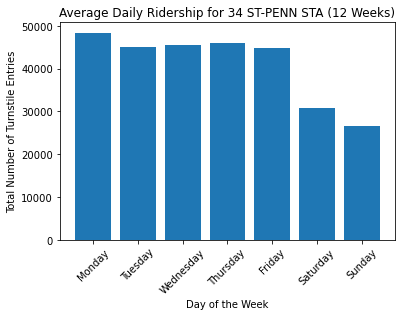

In [109]:
#34 ST-PENN STA Average Daily Bar Plot
plt.bar(penn_34_daily_average.keys(),penn_34_daily_average.values())
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Daily Ridership for 34 ST-PENN STA (12 Weeks)');

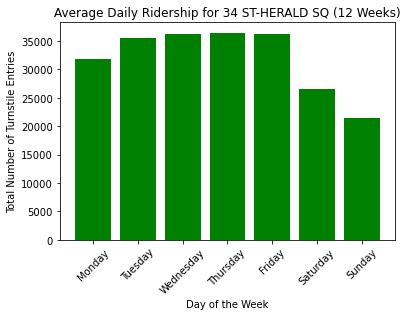

In [116]:
#34 ST-HERALD SQ Average Daily Bar Plot
plt.bar(herald_34_daily_average.keys(),herald_34_daily_average.values(),color='green')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Daily Ridership for 34 ST-HERALD SQ (12 Weeks)');

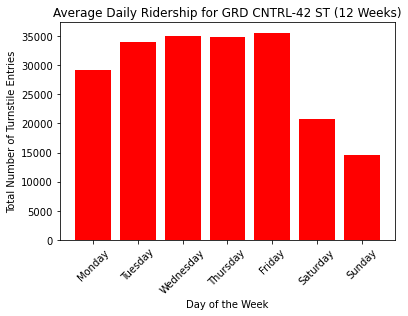

In [117]:
#GRD CNTRL-42 ST Average Daily Bar Plot
plt.bar(grd_central_daily_average.keys(),grd_central_daily_average.values(),color='red')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Daily Ridership for GRD CNTRL-42 ST (12 Weeks)');

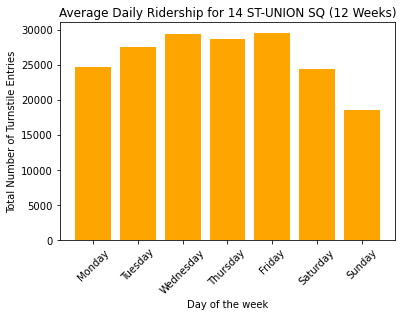

In [118]:
#14 ST-UNION SQ Average Daily Bar Plot
plt.bar(union_14_daily_average.keys(),union_14_daily_average.values(),color='orange')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Daily Ridership for 14 ST-UNION SQ (12 Weeks)');

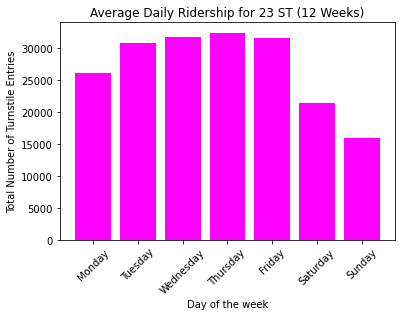

In [119]:
#23 ST Average Daily Bar Plot
plt.bar(twenty_three_daily_average.keys(),twenty_three_daily_average.values(),color='magenta')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Daily Ridership for 23 ST (12 Weeks)');

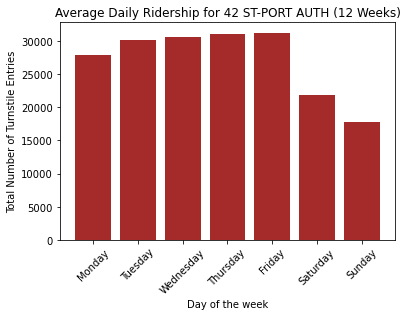

In [120]:
#42 ST-PORT AUTH Average Daily Bar Plot
plt.bar(porth_42_daily_average.keys(),porth_42_daily_average.values(),color='brown')
plt.xlabel('Day of the week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Daily Ridership for 42 ST-PORT AUTH (12 Weeks)');

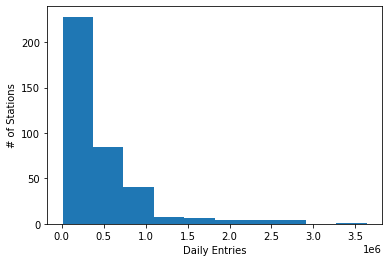

In [23]:
#Distribution plot of number of stations based on daily entries
plt.hist(total_station['DAILY_ENTRIES']);
plt.xlabel('Daily Entries')
plt.ylabel('# of Stations');

Text(0, 0.5, 'Cumulative Daily Entries')

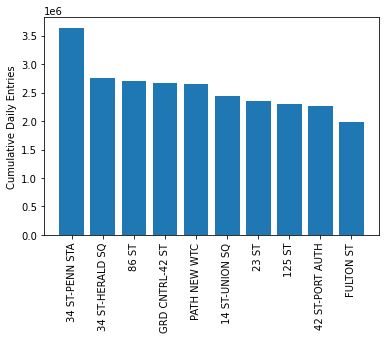

In [24]:
#Top ten station plot
plt.bar(x=total_station['STATION'][:10], height=total_station['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)
plt.ylabel("Cumulative Daily Entries")

In [176]:
######### HOURLY PLOT #########

turnstiles_hourly = (df_turnstile
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],as_index=False)
                        .ENTRIES.first())
#Plotting Time Line Chart for Monday-Friday at 34 ST-PENN STA

penn_34_hourly=turnstiles_hourly[(turnstiles_hourly["STATION"]=="34 ST-PENN STA")].copy()
#penn_34_hourly

#Plotting Time Line Chart for Monday-Friday at 34 ST-HERALD SQ

herald_34_hourly=turnstiles_hourly[(turnstiles_hourly["STATION"]=="34 ST-HERALD SQ")].copy()
#herald_34_hourly

#Plotting Time Line Chart for Monday-Friday at GRD CNTRL-42 ST

grd_cntrl_hourly=turnstiles_hourly[(turnstiles_hourly["STATION"]=="GRD CNTRL-42 ST")].copy()
#grd_cntrl_hourly

#Plotting Time Line Chart for Monday-Friday at 14 ST-UNION SQ

union_14_hourly=turnstiles_hourly[(turnstiles_hourly["STATION"]=="14 ST-UNION SQ")].copy()
#union_14_hourly

#Plotting Time Line Chart for Monday-Friday at 23 ST

twenty_three_hourly=turnstiles_hourly[(turnstiles_hourly["STATION"]=="23 ST")].copy()
#twenty_three_hourly

#Plotting Time Line Chart for Monday-Friday at 42 ST-PORT AUTH


porth_42_hourly=turnstiles_hourly[(turnstiles_hourly["STATION"]=="42 ST-PORT AUTH")].copy()
porth_42_hourly

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
639805,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,02:00:00,11612846
639806,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,06:00:00,11612847
639807,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,10:00:00,11612883
639808,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,14:00:00,11612926
639809,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,18:00:00,11613018
...,...,...,...,...,...,...,...
665495,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,04:00:00,589824
665496,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,08:00:00,589824
665497,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,12:00:00,589824
665498,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,16:00:00,589824


In [177]:
penn_34_hourly['PREV_ENTRIES']=penn_34_hourly.ENTRIES.shift(1)
penn_34_hourly.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True)
#penn_34_hourly.head()

herald_34_hourly['PREV_ENTRIES']=herald_34_hourly.ENTRIES.shift(1)
herald_34_hourly.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True)
#herald_34_hourly

grd_cntrl_hourly['PREV_ENTRIES']=grd_cntrl_hourly.ENTRIES.shift(1)
grd_cntrl_hourly.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True)
#grd_cntrl_hourly

union_14_hourly['PREV_ENTRIES']=union_14_hourly.ENTRIES.shift(1)
union_14_hourly.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True)
#union_14_hourly

twenty_three_hourly['PREV_ENTRIES']=twenty_three_hourly.ENTRIES.shift(1)
twenty_three_hourly.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True)
#twenty_three_hourly

porth_42_hourly['PREV_ENTRIES']=porth_42_hourly.ENTRIES.shift(1)
porth_42_hourly.dropna(subset=["PREV_ENTRIES"], axis=0, inplace=True)
porth_42_hourly

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_ENTRIES
639806,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,06:00:00,11612847,11612846.0
639807,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,10:00:00,11612883,11612847.0
639808,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,14:00:00,11612926,11612883.0
639809,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,18:00:00,11613018,11612926.0
639810,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,22:00:00,11613089,11613018.0
...,...,...,...,...,...,...,...,...
665495,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,04:00:00,589824,589824.0
665496,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,08:00:00,589824,589824.0
665497,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,12:00:00,589824,589824.0
665498,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,16:00:00,589824,589824.0


In [178]:
penn_34_hourly["DAILY_ENTRIES"] = penn_34_hourly.apply(daily_entry_count, axis=1 , max_count=1000)
#penn_34_hourly.describe()
#penn_34_hourly

herald_34_hourly["DAILY_ENTRIES"] = herald_34_hourly.apply(daily_entry_count, axis=1 , max_count=1000)
#herald_34_hourly.describe()
#herald_34_hourly

grd_cntrl_hourly["DAILY_ENTRIES"] = grd_cntrl_hourly.apply(daily_entry_count, axis=1 , max_count=1000)
#grd_cntrl_hourly.describe()
#grd_cntrl_hourly

union_14_hourly["DAILY_ENTRIES"] = union_14_hourly.apply(daily_entry_count, axis=1 , max_count=1000)
#union_14_hourly.describe()
#union_14_hourly

twenty_three_hourly["DAILY_ENTRIES"] = twenty_three_hourly.apply(daily_entry_count, axis=1 , max_count=1000)
#twenty_three_hourly.describe()
#twenty_three_hourly

porth_42_hourly["DAILY_ENTRIES"] = porth_42_hourly.apply(daily_entry_count, axis=1 , max_count=1000)
#porth_42_hourly.describe()
porth_42_hourly

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
639806,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,06:00:00,11612847,11612846.0,1.0
639807,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,10:00:00,11612883,11612847.0,36.0
639808,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,14:00:00,11612926,11612883.0,43.0
639809,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,18:00:00,11613018,11612926.0,92.0
639810,N060,R010,01-00-00,42 ST-PORT AUTH,04/24/2021,22:00:00,11613089,11613018.0,71.0
...,...,...,...,...,...,...,...,...,...
665495,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,04:00:00,589824,589824.0,0.0
665496,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,08:00:00,589824,589824.0,0.0
665497,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,12:00:00,589824,589824.0,0.0
665498,N063A,R011,00-05-01,42 ST-PORT AUTH,07/16/2021,16:00:00,589824,589824.0,0.0


In [179]:
unique_penn_34_hourly = penn_34_hourly.groupby(["STATION","DATE","TIME"])[["DAILY_ENTRIES"]].sum().reset_index().copy()
#unique_penn_34_hourly

unique_herald_34_hourly = herald_34_hourly.groupby(["STATION","DATE","TIME"])[["DAILY_ENTRIES"]].sum().reset_index().copy()
#unique_herald_34_hourly

unique_grd_cntrl_hourly = grd_cntrl_hourly.groupby(["STATION","DATE","TIME"])[["DAILY_ENTRIES"]].sum().reset_index().copy()
#unique_grd_cntrl_hourly

unique_union_14_hourly = union_14_hourly.groupby(["STATION","DATE","TIME"])[["DAILY_ENTRIES"]].sum().reset_index().copy()
#unique_union_14_hourly

unique_twenty_three_hourly = twenty_three_hourly.groupby(["STATION","DATE","TIME"])[["DAILY_ENTRIES"]].sum().reset_index().copy()
#unique_twenty_three_hourly

unique_porth_42_hourly = porth_42_hourly.groupby(["STATION","DATE","TIME"])[["DAILY_ENTRIES"]].sum().reset_index().copy()
unique_porth_42_hourly

,STATION,DATE,TIME,DAILY_ENTRIES
0,42 ST-PORT AUTH,04/24/2021,00:00:00,0.0
1,42 ST-PORT AUTH,04/24/2021,02:00:00,0.0
2,42 ST-PORT AUTH,04/24/2021,04:00:00,189.0
3,42 ST-PORT AUTH,04/24/2021,06:00:00,89.0
4,42 ST-PORT AUTH,04/24/2021,08:00:00,1224.0
...,...,...,...,...
1007,42 ST-PORT AUTH,07/16/2021,14:00:00,2035.0
1008,42 ST-PORT AUTH,07/16/2021,16:00:00,4120.0
1009,42 ST-PORT AUTH,07/16/2021,18:00:00,3355.0
1010,42 ST-PORT AUTH,07/16/2021,20:00:00,5210.0


In [29]:
#unique_penn_34_hourly=unique_penn_34_hourly.drop([0])
#unique_penn_34_hourly=unique_penn_34_hourly.drop([1])
unique_penn_34_hourly.head(50)

,STATION,DATE,TIME,DAILY_ENTRIES
0,34 ST-PENN STA,04/24/2021,00:00:00,0.0
1,34 ST-PENN STA,04/24/2021,02:00:00,0.0
2,34 ST-PENN STA,04/24/2021,04:00:00,404.0
3,34 ST-PENN STA,04/24/2021,06:00:00,121.0
4,34 ST-PENN STA,04/24/2021,08:00:00,894.0
5,34 ST-PENN STA,04/24/2021,10:00:00,916.0
6,34 ST-PENN STA,04/24/2021,12:00:00,3145.0
7,34 ST-PENN STA,04/24/2021,14:00:00,2032.0
8,34 ST-PENN STA,04/24/2021,16:00:00,5647.0
9,34 ST-PENN STA,04/24/2021,18:00:00,2398.0


Text(0.5, 1.0, '34 ST-PENN STA - HOURLY STATION PLOT')

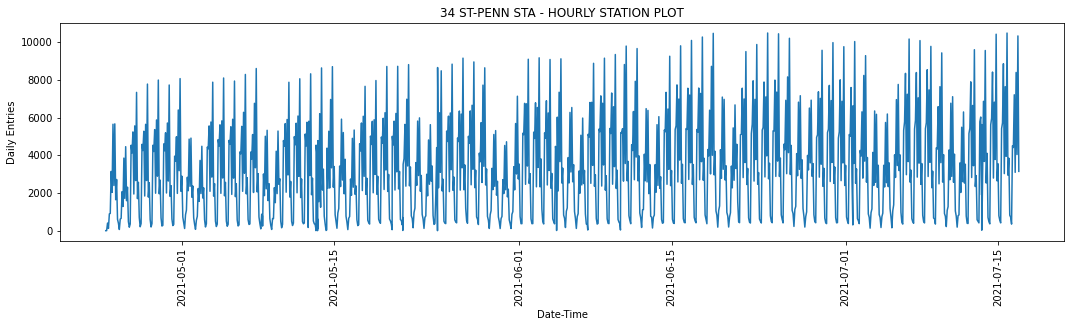

In [30]:
#PENN-34 CONTINUOUS HOURLY PLOT

unique_penn_34_hourly["DATE-TIME"] = pd.to_datetime(unique_penn_34_hourly["DATE"] + ' ' + unique_penn_34_hourly["TIME"])
unique_penn_34_hourly

plt.figure(figsize=(18,4))
plt.plot(unique_penn_34_hourly['DATE-TIME'],unique_penn_34_hourly['DAILY_ENTRIES'])
plt.xlabel('Date-Time')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('34 ST-PENN STA - HOURLY STATION PLOT')

Text(0.5, 1.0, '34 ST-HERALD SQ - HOURLY STATION PLOT')

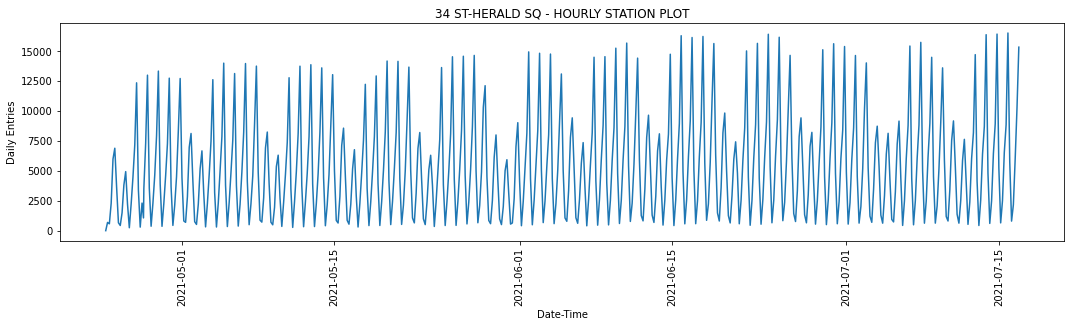

In [153]:
#HERALD-34 CONTINUOUS HOURLY PLOT

unique_herald_34_hourly["DATE-TIME"] = pd.to_datetime(unique_herald_34_hourly["DATE"] + ' ' + unique_herald_34_hourly["TIME"])
unique_herald_34_hourly

plt.figure(figsize=(18,4))
plt.plot(unique_herald_34_hourly['DATE-TIME'],unique_herald_34_hourly['DAILY_ENTRIES'])
plt.xlabel('Date-Time')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('34 ST-HERALD SQ - HOURLY STATION PLOT')

Text(0.5, 1.0, 'GRD CNTRL-42 ST - HOURLY STATION PLOT')

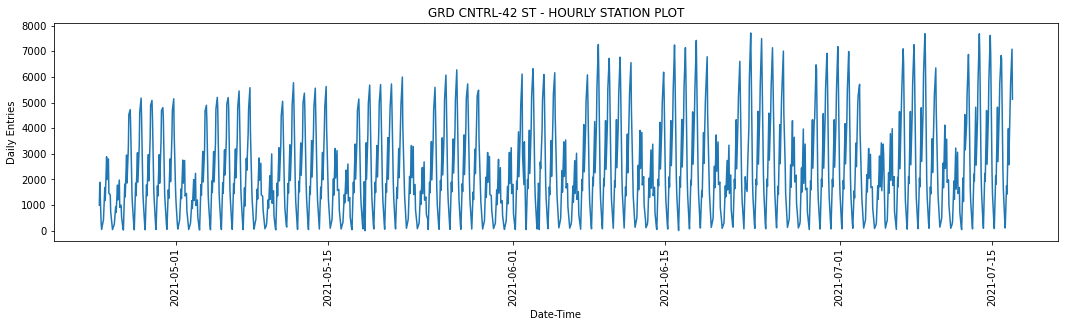

In [175]:
#GRD CNTRL-42 ST CONTINUOUS HOURLY PLOT

unique_grd_cntrl_hourly["DATE-TIME"] = pd.to_datetime(unique_grd_cntrl_hourly["DATE"] + ' ' + unique_grd_cntrl_hourly["TIME"])
unique_grd_cntrl_hourly

plt.figure(figsize=(18,4))
plt.plot(unique_grd_cntrl_hourly['DATE-TIME'],unique_grd_cntrl_hourly['DAILY_ENTRIES'])
plt.xlabel('Date-Time')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('GRD CNTRL-42 ST - HOURLY STATION PLOT')

Text(0.5, 1.0, '14 ST-UNION SQ - HOURLY STATION PLOT')

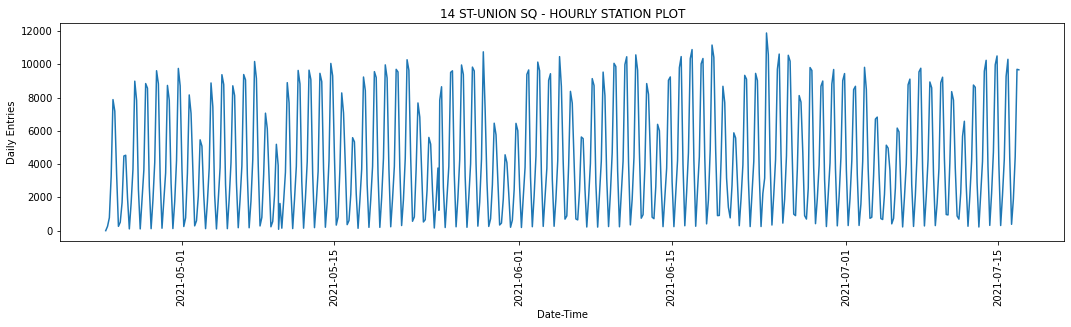

In [180]:
#14 ST-UNION SQ CONTINUOUS HOURLY PLOT

unique_union_14_hourly["DATE-TIME"] = pd.to_datetime(unique_union_14_hourly["DATE"] + ' ' + unique_union_14_hourly["TIME"])
unique_union_14_hourly

plt.figure(figsize=(18,4))
plt.plot(unique_union_14_hourly['DATE-TIME'],unique_union_14_hourly['DAILY_ENTRIES'])
plt.xlabel('Date-Time')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('14 ST-UNION SQ - HOURLY STATION PLOT')

Text(0.5, 1.0, '23 ST - HOURLY STATION PLOT')

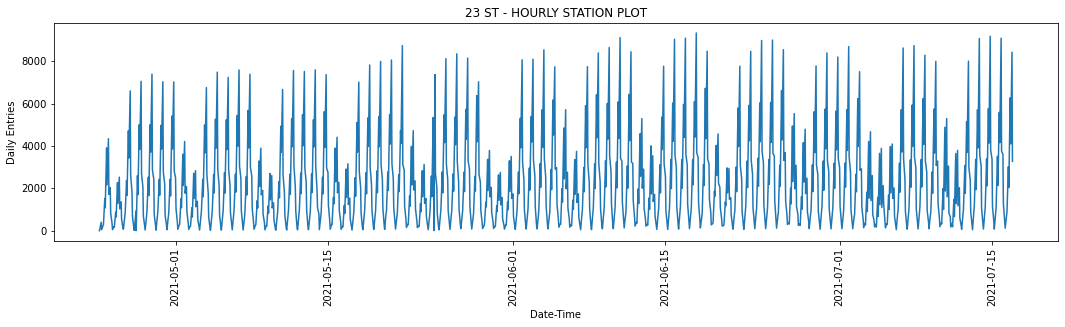

In [181]:
#23 ST CONTINUOUS HOURLY PLOT

unique_twenty_three_hourly["DATE-TIME"] = pd.to_datetime(unique_twenty_three_hourly["DATE"] + ' ' + unique_twenty_three_hourly["TIME"])
unique_twenty_three_hourly

plt.figure(figsize=(18,4))
plt.plot(unique_twenty_three_hourly['DATE-TIME'],unique_twenty_three_hourly['DAILY_ENTRIES'])
plt.xlabel('Date-Time')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('23 ST - HOURLY STATION PLOT')

Text(0.5, 1.0, '42 ST-PORT AUTH - HOURLY STATION PLOT')

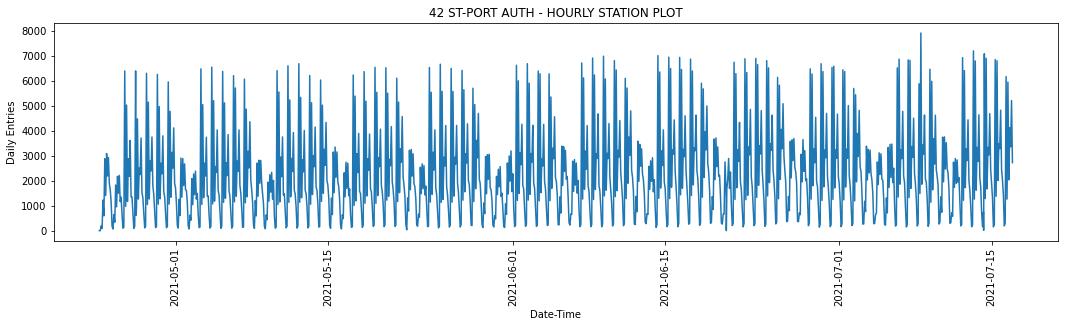

In [182]:
#42 ST-PORT AUTH CONTINUOUS HOURLY PLOT

unique_porth_42_hourly["DATE-TIME"] = pd.to_datetime(unique_porth_42_hourly["DATE"] + ' ' + unique_porth_42_hourly["TIME"])
unique_porth_42_hourly

plt.figure(figsize=(18,4))
plt.plot(unique_porth_42_hourly['DATE-TIME'],unique_porth_42_hourly['DAILY_ENTRIES'])
plt.xlabel('Date-Time')
plt.xticks(rotation=90)
plt.ylabel('Daily Entries')
plt.title('42 ST-PORT AUTH - HOURLY STATION PLOT')

In [31]:
unique_penn_34_hourly

,STATION,DATE,TIME,DAILY_ENTRIES,DATE-TIME
0,34 ST-PENN STA,04/24/2021,00:00:00,0.0,2021-04-24 00:00:00
1,34 ST-PENN STA,04/24/2021,02:00:00,0.0,2021-04-24 02:00:00
2,34 ST-PENN STA,04/24/2021,04:00:00,404.0,2021-04-24 04:00:00
3,34 ST-PENN STA,04/24/2021,06:00:00,121.0,2021-04-24 06:00:00
4,34 ST-PENN STA,04/24/2021,08:00:00,894.0,2021-04-24 08:00:00
...,...,...,...,...,...
1031,34 ST-PENN STA,07/16/2021,14:00:00,3094.0,2021-07-16 14:00:00
1032,34 ST-PENN STA,07/16/2021,16:00:00,8395.0,2021-07-16 16:00:00
1033,34 ST-PENN STA,07/16/2021,18:00:00,4041.0,2021-07-16 18:00:00
1034,34 ST-PENN STA,07/16/2021,20:00:00,10333.0,2021-07-16 20:00:00


In [183]:
unique_penn_34_hourly['DAYS_OF_WEEK'] = pd.to_datetime(unique_penn_34_hourly['DATE']).dt.day_name()
unique_penn_34_hourly['WEEK_OF_YEAR'] = pd.to_datetime(unique_penn_34_hourly['DATE']).dt.isocalendar().week
#unique_penn_34_hourly

unique_herald_34_hourly['DAYS_OF_WEEK'] = pd.to_datetime(unique_herald_34_hourly['DATE']).dt.day_name()
unique_herald_34_hourly['WEEK_OF_YEAR'] = pd.to_datetime(unique_herald_34_hourly['DATE']).dt.isocalendar().week
#unique_herald_34_hourly.iloc[50:100]

unique_grd_cntrl_hourly['DAYS_OF_WEEK'] = pd.to_datetime(unique_grd_cntrl_hourly['DATE']).dt.day_name()
unique_grd_cntrl_hourly['WEEK_OF_YEAR'] = pd.to_datetime(unique_grd_cntrl_hourly['DATE']).dt.isocalendar().week

unique_union_14_hourly['DAYS_OF_WEEK'] = pd.to_datetime(unique_union_14_hourly['DATE']).dt.day_name()
unique_union_14_hourly['WEEK_OF_YEAR'] = pd.to_datetime(unique_union_14_hourly['DATE']).dt.isocalendar().week

unique_twenty_three_hourly['DAYS_OF_WEEK'] = pd.to_datetime(unique_twenty_three_hourly['DATE']).dt.day_name()
unique_twenty_three_hourly['WEEK_OF_YEAR'] = pd.to_datetime(unique_twenty_three_hourly['DATE']).dt.isocalendar().week

unique_porth_42_hourly['DAYS_OF_WEEK'] = pd.to_datetime(unique_porth_42_hourly['DATE']).dt.day_name()
unique_porth_42_hourly['WEEK_OF_YEAR'] = pd.to_datetime(unique_porth_42_hourly['DATE']).dt.isocalendar().week
unique_porth_42_hourly

,STATION,DATE,TIME,DAILY_ENTRIES,DATE-TIME,DAYS_OF_WEEK,WEEK_OF_YEAR
0,42 ST-PORT AUTH,04/24/2021,00:00:00,0.0,2021-04-24 00:00:00,Saturday,16
1,42 ST-PORT AUTH,04/24/2021,02:00:00,0.0,2021-04-24 02:00:00,Saturday,16
2,42 ST-PORT AUTH,04/24/2021,04:00:00,189.0,2021-04-24 04:00:00,Saturday,16
3,42 ST-PORT AUTH,04/24/2021,06:00:00,89.0,2021-04-24 06:00:00,Saturday,16
4,42 ST-PORT AUTH,04/24/2021,08:00:00,1224.0,2021-04-24 08:00:00,Saturday,16
...,...,...,...,...,...,...,...
1007,42 ST-PORT AUTH,07/16/2021,14:00:00,2035.0,2021-07-16 14:00:00,Friday,28
1008,42 ST-PORT AUTH,07/16/2021,16:00:00,4120.0,2021-07-16 16:00:00,Friday,28
1009,42 ST-PORT AUTH,07/16/2021,18:00:00,3355.0,2021-07-16 18:00:00,Friday,28
1010,42 ST-PORT AUTH,07/16/2021,20:00:00,5210.0,2021-07-16 20:00:00,Friday,28


In [157]:
unique_herald_34_hourly

,STATION,DATE,TIME,DAILY_ENTRIES,DATE-TIME,DAYS_OF_WEEK,WEEK_OF_YEAR
0,34 ST-HERALD SQ,04/24/2021,00:00:00,0.0,2021-04-24 00:00:00,Saturday,16
1,34 ST-HERALD SQ,04/24/2021,04:00:00,691.0,2021-04-24 04:00:00,Saturday,16
2,34 ST-HERALD SQ,04/24/2021,08:00:00,573.0,2021-04-24 08:00:00,Saturday,16
3,34 ST-HERALD SQ,04/24/2021,12:00:00,2294.0,2021-04-24 12:00:00,Saturday,16
4,34 ST-HERALD SQ,04/24/2021,16:00:00,5994.0,2021-04-24 16:00:00,Saturday,16
...,...,...,...,...,...,...,...
500,34 ST-HERALD SQ,07/16/2021,04:00:00,800.0,2021-07-16 04:00:00,Friday,28
501,34 ST-HERALD SQ,07/16/2021,08:00:00,2173.0,2021-07-16 08:00:00,Friday,28
502,34 ST-HERALD SQ,07/16/2021,12:00:00,6022.0,2021-07-16 12:00:00,Friday,28
503,34 ST-HERALD SQ,07/16/2021,16:00:00,10286.0,2021-07-16 16:00:00,Friday,28


In [189]:
# Pick a week from 5 random week for Penn-34 station
plot1=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==18) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Monday")].copy()
plot2=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==18) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Tuesday")].copy()
plot3=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==18) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Wednesday")].copy()
plot4=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==18) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot5=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==18) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Friday")].copy()
unique_penn_34_hourly_plot=pd.concat([plot1,plot2,plot3,plot4,plot5])
#unique_penn_34_hourly_plot

# Pick a week from 5 random week for Herald-34 station
plot11=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==18) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Monday")].copy()
plot21=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==18) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Tuesday")].copy()
plot31=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==18) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Wednesday")].copy()
plot41=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==18) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot51=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==18) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Friday")].copy()
unique_herald_34_hourly_plot=pd.concat([plot11,plot21,plot31,plot41,plot51])
#unique_herald_34_hourly_plot

# Pick a week from 5 random week for Grand-Central station
plot12=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==18) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Monday")].copy()
plot22=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==18) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Tuesday")].copy()
plot32=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==18) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Wednesday")].copy()
plot42=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==18) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot52=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==18) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Friday")].copy()
unique_grd_cntrl_hourly_plot=pd.concat([plot12,plot22,plot32,plot42,plot52])
#unique_grd_cntrl_hourly_plot

# Pick a week from 5 random week for 14-Union station
plot13=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==18) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Monday")].copy()
plot23=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==18) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Tuesday")].copy()
plot33=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==18) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Wednesday")].copy()
plot43=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==18) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot53=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==18) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Friday")].copy()
unique_union_14_hourly_plot=pd.concat([plot13,plot23,plot33,plot43,plot53])
#unique_union_14_hourly_plot

# Pick a week from 5 random week for 23-St station
plot14=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==18) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Monday")].copy()
plot24=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==18) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Tuesday")].copy()
plot34=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==18) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Wednesday")].copy()
plot44=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==18) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot54=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==18) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Friday")].copy()
unique_twenty_three_hourly_plot=pd.concat([plot14,plot24,plot34,plot44,plot54])
#unique_twenty_three_hourly_plot

# Pick a week from 5 random week for 42-Port station
plot15=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==18) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Monday")].copy()
plot25=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==18) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Tuesday")].copy()
plot35=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==18) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Wednesday")].copy()
plot45=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==18) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot55=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==18) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Friday")].copy()
unique_porth_42_hourly_plot=pd.concat([plot15,plot25,plot35,plot45,plot55])
unique_porth_42_hourly_plot

,STATION,DATE,TIME,DAILY_ENTRIES,DATE-TIME,DAYS_OF_WEEK,WEEK_OF_YEAR
109,42 ST-PORT AUTH,05/03/2021,00:00:00,1494.0,2021-05-03 00:00:00,Monday,18
110,42 ST-PORT AUTH,05/03/2021,02:00:00,665.0,2021-05-03 02:00:00,Monday,18
111,42 ST-PORT AUTH,05/03/2021,04:00:00,123.0,2021-05-03 04:00:00,Monday,18
112,42 ST-PORT AUTH,05/03/2021,06:00:00,143.0,2021-05-03 06:00:00,Monday,18
113,42 ST-PORT AUTH,05/03/2021,08:00:00,6482.0,2021-05-03 08:00:00,Monday,18
114,42 ST-PORT AUTH,05/03/2021,10:00:00,1049.0,2021-05-03 10:00:00,Monday,18
115,42 ST-PORT AUTH,05/03/2021,12:00:00,5047.0,2021-05-03 12:00:00,Monday,18
116,42 ST-PORT AUTH,05/03/2021,14:00:00,1320.0,2021-05-03 14:00:00,Monday,18
117,42 ST-PORT AUTH,05/03/2021,16:00:00,2709.0,2021-05-03 16:00:00,Monday,18
118,42 ST-PORT AUTH,05/03/2021,18:00:00,2187.0,2021-05-03 18:00:00,Monday,18


In [190]:
#Calculate Hourly mean

penn_34_hourly_ave1=unique_penn_34_hourly_plot.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#penn_34_hourly_ave1

herald_34_hourly_ave1=unique_herald_34_hourly_plot.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#herald_34_hourly_ave1

grd_cntrl_hourly_ave1=unique_grd_cntrl_hourly_plot.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#grd_cntrl_hourly_ave1

union_14_hourly_ave1=unique_union_14_hourly_plot.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#union_14_hourly_ave1

twenty_three_hourly_ave1=unique_twenty_three_hourly_plot.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#twenty_three_hourly_ave1

porth_42_hourly_ave1=unique_porth_42_hourly_plot.groupby(["TIME"])["DAILY_ENTRIES"].mean()
porth_42_hourly_ave1

TIME
00:00:00    1438.0
02:00:00     735.6
04:00:00     109.4
06:00:00     167.0
08:00:00    6338.0
10:00:00    1104.4
12:00:00    5190.8
14:00:00    1307.6
16:00:00    2794.8
18:00:00    2319.4
20:00:00    4005.0
22:00:00    1693.4
Name: DAILY_ENTRIES, dtype: float64

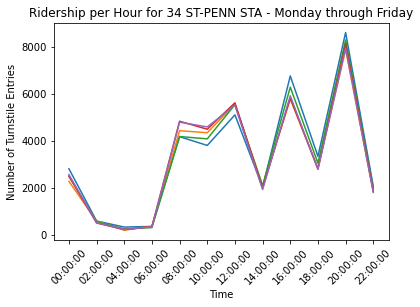

In [34]:
for i, group in unique_penn_34_hourly_plot.groupby('DAYS_OF_WEEK'):
    plt.plot(group['TIME'], group['DAILY_ENTRIES'])
    
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Number of Turnstile Entries')
plt.title('Ridership per Hour for 34 ST-PENN STA - Monday through Friday');

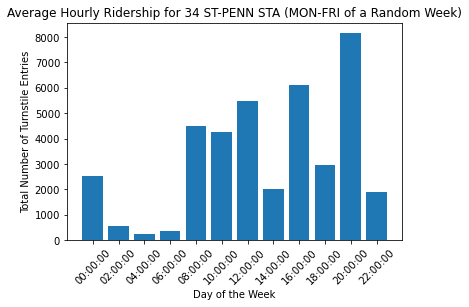

In [136]:
#34 ST-PENN STA Hourly Daily Bar Plot
plt.bar(penn_34_hourly_ave1.index,penn_34_hourly_ave1)
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 34 ST-PENN STA (MON-FRI of a Random Week)');

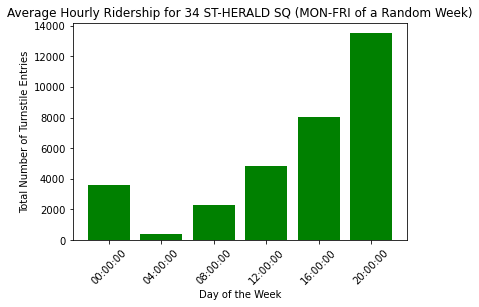

In [163]:
#34 ST-HERALD SQ Hourly Daily Bar Plot
plt.bar(herald_34_hourly_ave1.index,herald_34_hourly_ave1,color='green')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 34 ST-HERALD SQ (MON-FRI of a Random Week)');

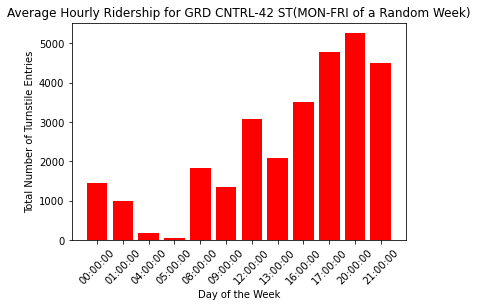

In [193]:
#GRD CNTRL-42 ST Hourly Daily Bar Plot
plt.bar(grd_cntrl_hourly_ave1.index,grd_cntrl_hourly_ave1,color='red')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for GRD CNTRL-42 ST(MON-FRI of a Random Week)');

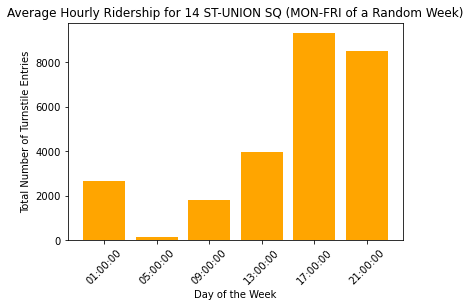

In [195]:
#14 ST-UNION SQ Hourly Daily Bar Plot
plt.bar(union_14_hourly_ave1.index,union_14_hourly_ave1,color='orange')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 14 ST-UNION SQ (MON-FRI of a Random Week)');

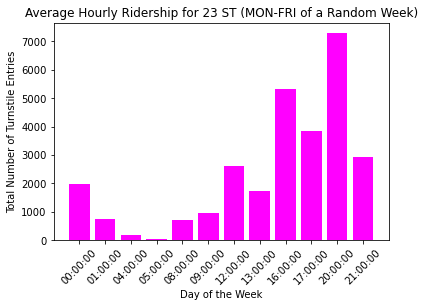

In [199]:
#23 ST Hourly Daily Bar Plot
plt.bar(twenty_three_hourly_ave1.index,twenty_three_hourly_ave1,color='magenta')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 23 ST (MON-FRI of a Random Week)');


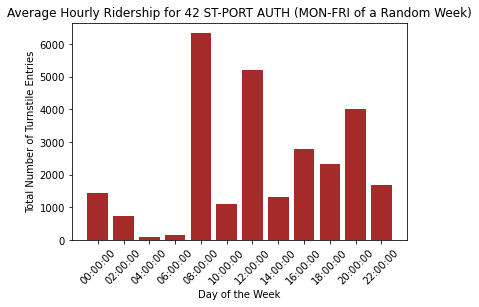

In [200]:
#42 ST-PORT AUTH Hourly Daily Bar Plot
plt.bar(porth_42_hourly_ave1.index,porth_42_hourly_ave1,color='brown')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 42 ST-PORT AUTH (MON-FRI of a Random Week)');

In [166]:
unique_penn_34_hourly.head(50)

,STATION,DATE,TIME,DAILY_ENTRIES,DAYS_OF_WEEK,WEEK_OF_YEAR
0,34 ST-PENN STA,04/24/2021,00:00:00,0.0,Saturday,16
1,34 ST-PENN STA,04/24/2021,02:00:00,0.0,Saturday,16
2,34 ST-PENN STA,04/24/2021,04:00:00,404.0,Saturday,16
3,34 ST-PENN STA,04/24/2021,06:00:00,121.0,Saturday,16
4,34 ST-PENN STA,04/24/2021,08:00:00,889.0,Saturday,16
5,34 ST-PENN STA,04/24/2021,10:00:00,916.0,Saturday,16
6,34 ST-PENN STA,04/24/2021,12:00:00,3103.0,Saturday,16
7,34 ST-PENN STA,04/24/2021,14:00:00,2032.0,Saturday,16
8,34 ST-PENN STA,04/24/2021,16:00:00,5596.0,Saturday,16
9,34 ST-PENN STA,04/24/2021,18:00:00,2398.0,Saturday,16


In [201]:
plot6=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==18) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot7=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==17) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot8=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==25) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot9=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==21) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot10=unique_penn_34_hourly[(unique_penn_34_hourly["WEEK_OF_YEAR"]==22) & (unique_penn_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
unique_penn_34_hourly_plot2=pd.concat([plot6,plot7,plot8,plot9,plot10])
#unique_penn_34_hourly_plot2

plot61=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==18) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot71=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==17) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot81=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==25) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot91=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==21) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot101=unique_herald_34_hourly[(unique_herald_34_hourly["WEEK_OF_YEAR"]==22) & (unique_herald_34_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
unique_herald_34_hourly_plot2=pd.concat([plot61,plot71,plot81,plot91,plot101])
#unique_herald_34_hourly_plot2

plot62=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==18) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot72=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==17) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot82=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==25) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot92=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==21) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot102=unique_grd_cntrl_hourly[(unique_grd_cntrl_hourly["WEEK_OF_YEAR"]==22) & (unique_grd_cntrl_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
unique_grd_cntrl_hourly_plot2=pd.concat([plot62,plot72,plot82,plot92,plot102])
#unique_grd_cntrl_hourly_plot2

plot63=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==18) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot73=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==17) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot83=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==25) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot93=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==21) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot103=unique_union_14_hourly[(unique_union_14_hourly["WEEK_OF_YEAR"]==22) & (unique_union_14_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
unique_union_14_hourly_plot2=pd.concat([plot63,plot73,plot83,plot93,plot103])
#unique_union_14_hourly_plot2

plot64=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==18) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot74=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==17) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot84=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==25) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot94=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==21) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot104=unique_twenty_three_hourly[(unique_twenty_three_hourly["WEEK_OF_YEAR"]==22) & (unique_twenty_three_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
nique_twenty_three_hourly_plot2=pd.concat([plot64,plot74,plot84,plot94,plot104])
#nique_twenty_three_hourly_plot2

plot65=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==18) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot75=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==17) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot85=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==25) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot95=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==21) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
plot105=unique_porth_42_hourly[(unique_porth_42_hourly["WEEK_OF_YEAR"]==22) & (unique_porth_42_hourly["DAYS_OF_WEEK"]=="Thursday")].copy()
unique_porth_42_hourly_plot2=pd.concat([plot65,plot75,plot85,plot95,plot105])
unique_porth_42_hourly_plot2

,STATION,DATE,TIME,DAILY_ENTRIES,DATE-TIME,DAYS_OF_WEEK,WEEK_OF_YEAR
145,42 ST-PORT AUTH,05/06/2021,00:00:00,1369.0,2021-05-06 00:00:00,Thursday,18
146,42 ST-PORT AUTH,05/06/2021,02:00:00,750.0,2021-05-06 02:00:00,Thursday,18
147,42 ST-PORT AUTH,05/06/2021,04:00:00,99.0,2021-05-06 04:00:00,Thursday,18
148,42 ST-PORT AUTH,05/06/2021,06:00:00,181.0,2021-05-06 06:00:00,Thursday,18
149,42 ST-PORT AUTH,05/06/2021,08:00:00,6208.0,2021-05-06 08:00:00,Thursday,18
150,42 ST-PORT AUTH,05/06/2021,10:00:00,1153.0,2021-05-06 10:00:00,Thursday,18
151,42 ST-PORT AUTH,05/06/2021,12:00:00,5714.0,2021-05-06 12:00:00,Thursday,18
152,42 ST-PORT AUTH,05/06/2021,14:00:00,1382.0,2021-05-06 14:00:00,Thursday,18
153,42 ST-PORT AUTH,05/06/2021,16:00:00,2788.0,2021-05-06 16:00:00,Thursday,18
154,42 ST-PORT AUTH,05/06/2021,18:00:00,2371.0,2021-05-06 18:00:00,Thursday,18


In [202]:
penn_34_hourly_ave2=unique_penn_34_hourly_plot2.groupby(["TIME"])["DAILY_ENTRIES"].mean()
penn_34_hourly_ave2

herald_34_hourly_ave2=unique_herald_34_hourly_plot2.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#herald_34_hourly_ave2

grd_cntrl_hourly_ave2=unique_grd_cntrl_hourly_plot2.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#grd_cntrl_hourly_ave2

union_14_hourly_ave2=unique_union_14_hourly_plot2.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#union_14_hourly_ave2

twenty_three_hourly_ave2=nique_twenty_three_hourly_plot2.groupby(["TIME"])["DAILY_ENTRIES"].mean()
#twenty_three_hourly_ave2

porth_42_hourly_ave2=unique_porth_42_hourly_plot2.groupby(["TIME"])["DAILY_ENTRIES"].mean()
porth_42_hourly_ave2

TIME
00:00:00    1582.6
02:00:00     892.2
04:00:00     142.6
06:00:00     217.2
08:00:00    6418.0
10:00:00    1204.2
12:00:00    5827.6
14:00:00    1532.0
16:00:00    2985.8
18:00:00    2631.4
20:00:00    4199.4
22:00:00    1958.4
Name: DAILY_ENTRIES, dtype: float64

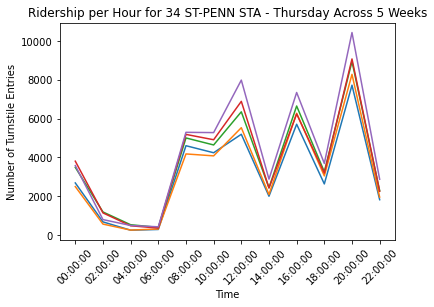

In [36]:
for i, group in unique_penn_34_hourly_plot2.groupby('WEEK_OF_YEAR'):
    plt.plot(group['TIME'], group['DAILY_ENTRIES'])
    
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Number of Turnstile Entries')
plt.title('Ridership per Hour for 34 ST-PENN STA - Thursday Across 5 Weeks');

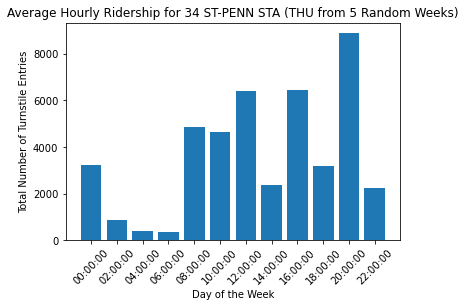

In [138]:
#34 ST-PENN STA Hourly Daily Bar Plot
plt.bar(penn_34_hourly_ave2.index,penn_34_hourly_ave2)
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 34 ST-PENN STA (THU from 5 Random Weeks)');

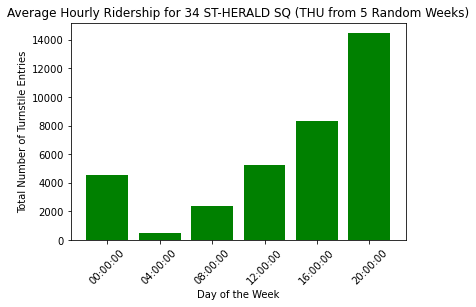

In [169]:
#34 ST-HERALD SQ Hourly Daily Bar Plot
plt.bar(herald_34_hourly_ave2.index,herald_34_hourly_ave2,color='green')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 34 ST-HERALD SQ (THU from 5 Random Weeks)');

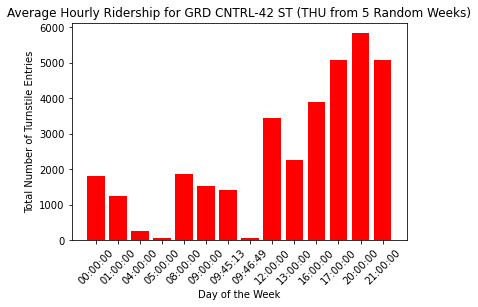

In [203]:
#GRD CNTRL-42 ST Hourly Daily Bar Plot
plt.bar(grd_cntrl_hourly_ave2.index,grd_cntrl_hourly_ave2,color='red')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for GRD CNTRL-42 ST (THU from 5 Random Weeks)');

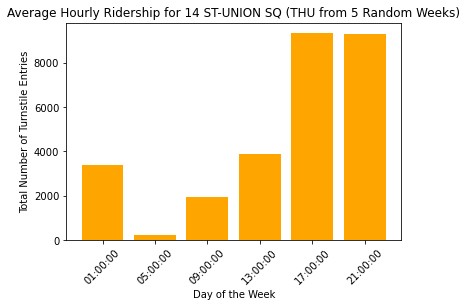

In [204]:
#14 ST-UNION SQ Hourly Daily Bar Plot
plt.bar(union_14_hourly_ave2.index,union_14_hourly_ave2,color='orange')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 14 ST-UNION SQ (THU from 5 Random Weeks)');

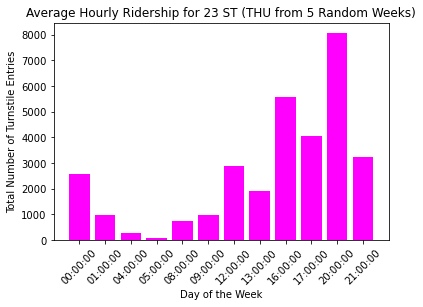

In [205]:
#23 ST Hourly Daily Bar Plot
plt.bar(twenty_three_hourly_ave2.index,twenty_three_hourly_ave2,color='magenta')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')
plt.title('Average Hourly Ridership for 23 ST (THU from 5 Random Weeks)');

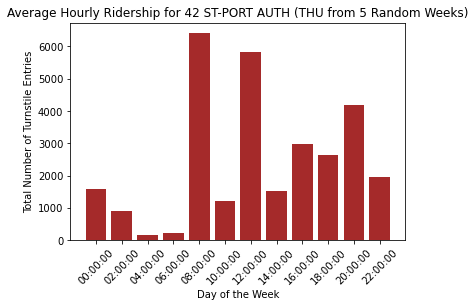

In [206]:
#42 ST-PORT AUTH Hourly Daily Bar Plot
plt.bar(porth_42_hourly_ave2.index,porth_42_hourly_ave2,color='brown')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Turnstile Entries')†
plt.title('Average Hourly Ridership for 42 ST-PORT AUTH (THU from 5 Random Weeks)');